# Model Selection

We will be doing a very basic best subset selection using r-leaps

In [13]:
library(ISLR)
library(leaps)
summary(Hitters)

     AtBat            Hits           HmRun            Runs       
 Min.   : 19.0   Min.   :  1.0   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:282.5   1st Qu.: 71.5   1st Qu.: 5.00   1st Qu.: 33.50  
 Median :413.0   Median :103.0   Median : 9.00   Median : 52.00  
 Mean   :403.6   Mean   :107.8   Mean   :11.62   Mean   : 54.75  
 3rd Qu.:526.0   3rd Qu.:141.5   3rd Qu.:18.00   3rd Qu.: 73.00  
 Max.   :687.0   Max.   :238.0   Max.   :40.00   Max.   :130.00  
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 30.00   1st Qu.: 23.00   1st Qu.: 4.000   1st Qu.:  842.5  
 Median : 47.00   Median : 37.00   Median : 6.000   Median : 1931.0  
 Mean   : 51.49   Mean   : 41.11   Mean   : 7.312   Mean   : 2657.5  
 3rd Qu.: 71.00   3rd Qu.: 57.00   3rd Qu.:10.000   3rd Qu.: 3890.5  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0  
     CHits            CHmRun           CRuns    

The data will need a little bit of formatting. We want to predict Salary, but looking at the summary of htters, we have 59 NAs! Lets just get rid of all rows with NAs, very nicely using ```na.omit()```. We can also check if there are any NAs left by using the ```is.na()``` function

In [2]:
Hitters <- na.omit(Hitters)
with(Hitters, sum(is.na(Salary)))
dim(Hitters)

[1] 0

[1] 263  20

# Best subset selection

We learned that this technique looks through all possible cominations of predictors, and gives us the aboslute best combination. This is computationally expensive and shouldn't be done for more than 20 predictors. In this case it is appropriate (19 predictors). We have the package ```leaps``` that has pre-built functions for doing best subset selection. Lets take a look!


In [3]:
regfit.full <- regsubsets(Salary~., data=Hitters, nvmax = 19)
regfit.full.summary <- summary(regfit.full); regfit.full.summary

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"

We can look at the names of the regfit.full output. Turns out it gives us a lot of useful information for making a decision about which model performs the best.

In [4]:
names(regfit.full.summary)
regfit.full.summary[['adjr2']]

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 0.3188503 0.4208024 0.4450753 0.4672734 0.4808971 0.4972001 0.5007849
 [8] 0.5137083 0.5180572 0.5222606 0.5225706 0.5217245 0.5206736 0.5195431
[15] 0.5178661 0.5162219 0.5144464 0.5126097 0.5106270

Lets take the model that minimizes the adjusted error measure of Cp. First we can plot this, then we can even make a mark of the lowest value

[1] 10

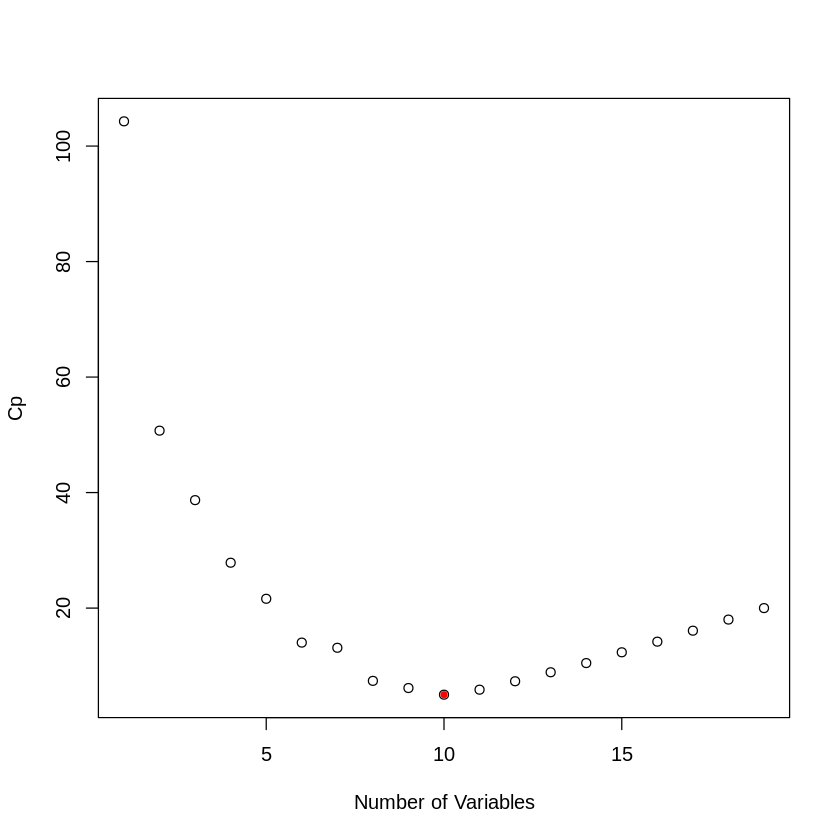

In [5]:
plot(regfit.full.summary$cp, xlab='Number of Variables', ylab='Cp')
which.min(regfit.full.summary$cp)
points(which.min(regfit.full.summary$cp), regfit.full.summary$cp[which.min(regfit.full.summary$cp)], col='red', pch=20 )

Regsubsets also has its own plot function, although it is a bit tough to read. When we plot for ```Cp``` we get a black and white checker board. The top of the plot (tested for adjr2 and Cp) will always show the best subset of variables to use for prediction. The White means VARIABLES ARE OUT, while the Black mean the VARIABLES ARE USED. We can look at the bottom half of this plot and see that the general trend is that bad models use all/a lot of the variables, and almost none of the variables. The good models intelligently pick variables that improve predictive power.

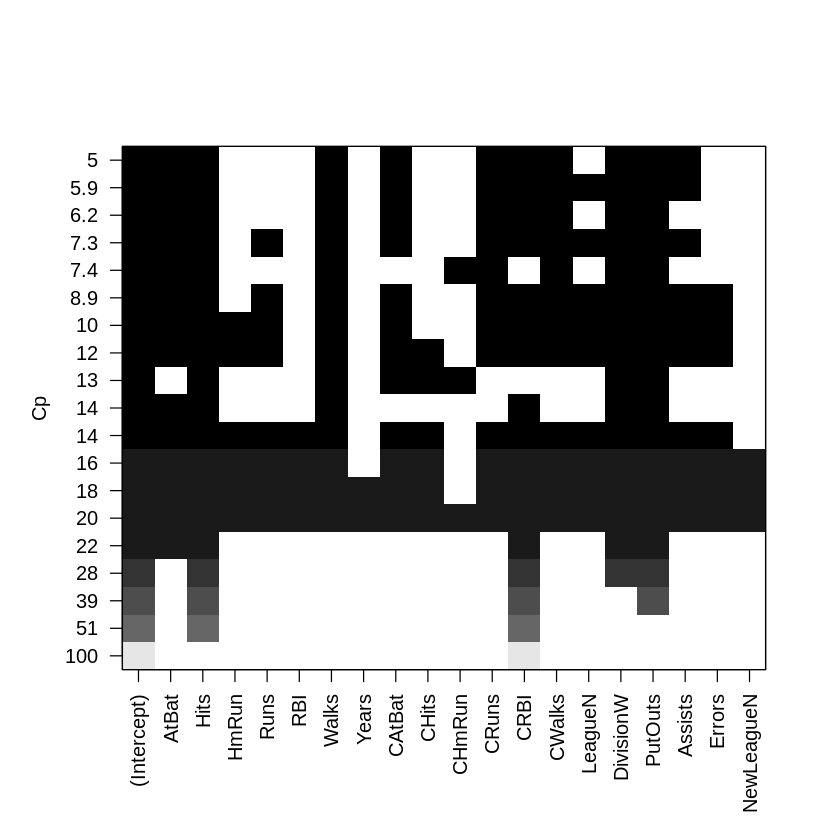

In [9]:
plot(regfit.full, scale='Cp')

We can pull out the coefficients from our regfit using a simple call to the ```coef``` function and pass it which model we would like.

In [12]:
print(coef(regfit.full, id=10))

 (Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680 
